In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

In [2]:
path = "../data/cleaned_data.csv"
df = pd.read_csv(path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DatePeriod         100000 non-null  object 
 1   AccountID          100000 non-null  int64  
 2   TransactionAmount  100000 non-null  float64
 3   Status             100000 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.1+ MB


In [4]:
df['DatePeriod'] = pd.to_datetime(df['DatePeriod'])
df.set_index('DatePeriod', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100000 entries, 2023-11-07 10:58:00 to 2023-04-30 04:59:00
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   AccountID          100000 non-null  int64  
 1   TransactionAmount  100000 non-null  float64
 2   Status             100000 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.1+ MB


In [6]:
df

,AccountID,TransactionAmount,Status
DatePeriod,,,
2023-11-07 10:58:00,405126,500000.0,sent
2023-11-07 10:56:00,378829,7400.0,sent
2023-11-07 10:56:00,405469,3000.0,sent
2023-11-07 10:56:00,2262,2000.0,sent
2023-11-07 10:54:00,402063,1300.0,sent
...,...,...,...
2023-04-30 05:42:00,364922,583.0,sent
2023-04-30 05:33:00,364922,3525.0,sent
2023-04-30 05:13:00,353700,2000.0,sent


In [7]:
df.AccountID.nunique()

3123

In [8]:
df.columns

Index(['AccountID', 'TransactionAmount', 'Status'], dtype='object')

# user-based insights

### (a.) number of unique AccountID exceeded 50 transactions per month and at what months?
user's transaction counts per month, and those above 50 transactions per month

In [9]:
# # user monthly transaction count - groping by year, month, accountID and transanction counts
monthly_count = df.groupby([df.index.month, 'AccountID'])['TransactionAmount'].count()
exceeded_50per_month = monthly_count[monthly_count > 50]

# Convert Series to DataFrame
monthly_count_df = pd.DataFrame(monthly_count.reset_index(name='TransactionCount'))
exceeded_50per_month_df = pd.DataFrame(exceeded_50per_month.reset_index(name='TransactionCount'))

In [10]:
exceeded_50per_month_df.rename(columns={'DatePeriod': 'Month'}, inplace=True)

In [11]:
# mapping months name to actual numeric values
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

exceeded_50per_month_df['Month'] = exceeded_50per_month_df['Month'].map(month_mapping)

In [12]:
exceeded_50per_month_df

,Month,AccountID,TransactionCount
0,May,524,77
1,May,2520,57
2,May,2719,52
3,May,23621,177
4,May,25887,56
...,...,...,...
247,October,397967,89
248,October,398948,51
249,October,399994,74
250,October,400254,54


/tmp/ipykernel_7150/3895783055.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='TransactionCount', data=exceeded_50per_month_df, palette='viridis')


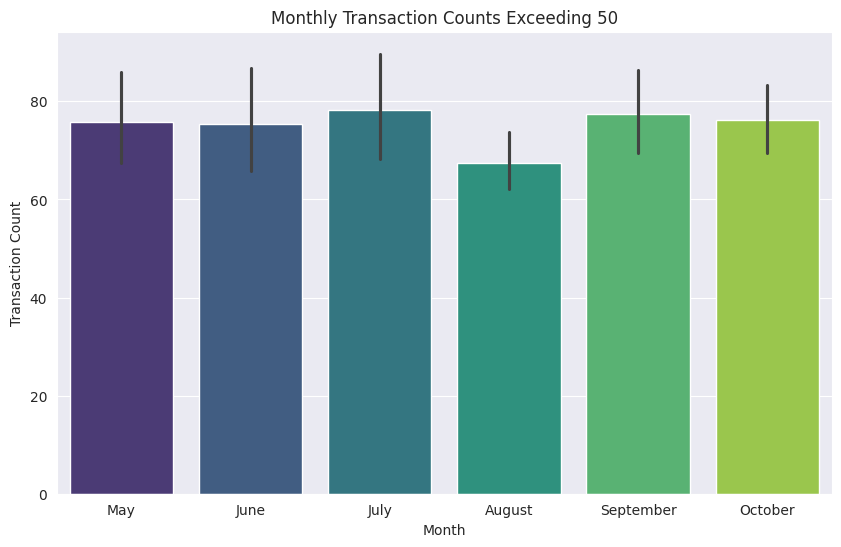

In [13]:
# Bar plot for TransactionCount by Month
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='TransactionCount', data=exceeded_50per_month_df, palette='viridis')
plt.title('Monthly Transaction Counts Exceeding 50')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()

In [14]:
# Checking for duplicated AccountIDs
duplicated_users = exceeded_50per_month_df['AccountID'][exceeded_50per_month_df['AccountID'].duplicated()]

duplicated_users.nunique()

58

### (b.) highest transaction accounts for each month

In [15]:
highest_transaction_per_month = df.groupby([df.index.month])['TransactionAmount'].idxmax()
highest_transaction_accounts = df.loc[highest_transaction_per_month]

In [16]:
highest_transaction_accounts

,AccountID,TransactionAmount,Status
DatePeriod,,,
2023-04-30 08:42:00,227645,600000.0,pending
2023-04-30 08:42:00,348446,10000.0,sent
2023-05-30 16:23:00,268900,21000000.0,sent
2023-06-12 21:39:00,226628,5000.0,sent
2023-06-12 21:39:00,217375,5125000.0,sent
2023-07-25 09:52:00,386902,5000000.0,sent
2023-08-28 11:23:00,350548,3000.0,sent
2023-08-28 11:23:00,6451,14872964.0,sent
2023-09-20 20:41:00,379947,5000000.0,sent


In [17]:
highest_transaction_per_month

DatePeriod
4    2023-04-30 08:42:00
5    2023-05-30 16:23:00
6    2023-06-12 21:39:00
7    2023-07-25 09:52:00
8    2023-08-28 11:23:00
9    2023-09-20 20:41:00
10   2023-10-23 23:58:00
11   2023-11-07 08:57:00
Name: TransactionAmount, dtype: datetime64[ns]

In [18]:
# Extract the month from the DateTimeIndex and map to actual month names
highest_transaction_accounts.index = highest_transaction_accounts.index.month.map(month_mapping)

In [19]:
highest_transaction_accounts

,AccountID,TransactionAmount,Status
DatePeriod,,,
April,227645,600000.0,pending
April,348446,10000.0,sent
May,268900,21000000.0,sent
June,226628,5000.0,sent
June,217375,5125000.0,sent
July,386902,5000000.0,sent
August,350548,3000.0,sent
August,6451,14872964.0,sent
September,379947,5000000.0,sent


In [28]:
type(highest_transaction_accounts.index)

pandas.core.indexes.base.Index

/tmp/ipykernel_7150/385875111.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=highest_transaction_accounts.index, y='TransactionAmount', data=highest_transaction_accounts, ci=None, palette='viridis')
/tmp/ipykernel_7150/385875111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=highest_transaction_accounts.index, y='TransactionAmount', data=highest_transaction_accounts, ci=None, palette='viridis')


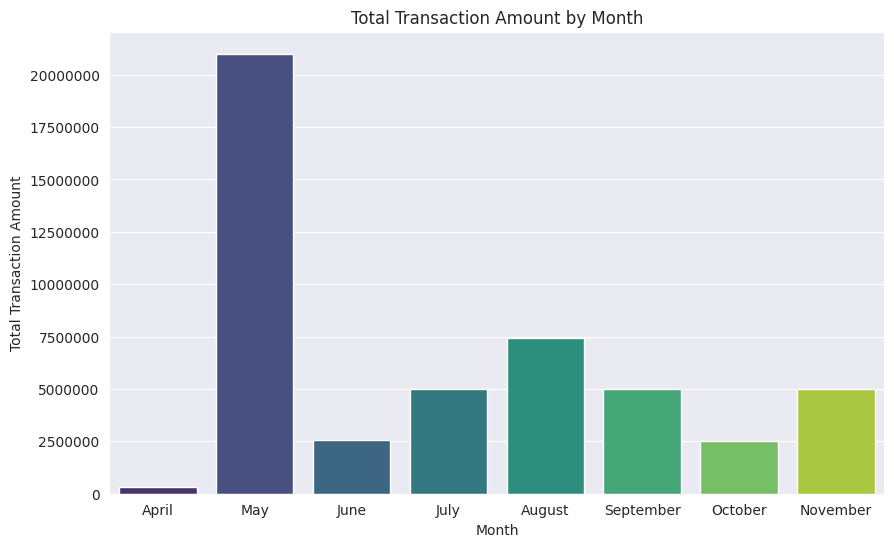

In [33]:
# Bar plot for total TransactionAmount by month
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=highest_transaction_accounts.index, y='TransactionAmount', data=highest_transaction_accounts, ci=None, palette='viridis')
ax.ticklabel_format(style='plain', axis='y')  # Disable scientific notation on the y-axis
plt.title('Total Transaction Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.show()

### (c.) visualization for highest months with more transactions

In [40]:
monthly_totals = df.groupby([df.index.month])['TransactionAmount'].sum()
monthly_totals_df = pd.DataFrame(monthly_totals.reset_index())

In [44]:
# monthly_totals_df.rename(columns={'DatePeriod': 'Month'}, inplace=True)

In [42]:
monthly_totals_df['Month'] = monthly_totals_df['Month'].map(month_mapping)

In [43]:
monthly_totals_df

,Month,TransactionAmount
0,April,5.754777e+06
1,May,3.343723e+08
2,June,3.993631e+08
3,July,3.968034e+08
4,August,4.793054e+08
5,September,4.759749e+08
6,October,6.709439e+08
7,November,2.260435e+08


/tmp/ipykernel_7150/1665724873.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Month', y='TransactionAmount', data=monthly_totals_df, ci=None, palette='viridis')
/tmp/ipykernel_7150/1665724873.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Month', y='TransactionAmount', data=monthly_totals_df, ci=None, palette='viridis')


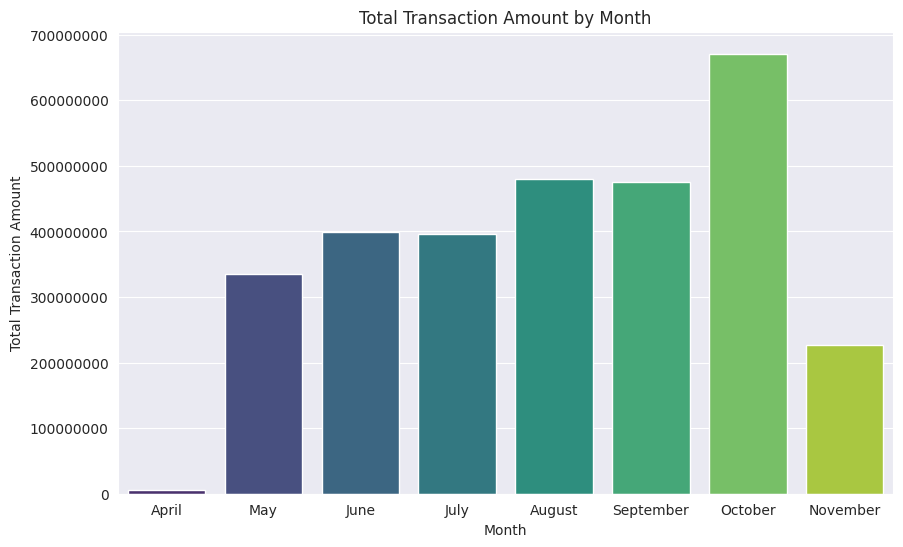

In [45]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Month', y='TransactionAmount', data=monthly_totals_df, ci=None, palette='viridis')
ax.ticklabel_format(style='plain', axis='y')  # Disable scientific notation on the y-axis
plt.title('Total Transaction Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.show()

### (d.) users with the amount of AccountID with an average of 30,000 transactions per month?

In [50]:
monthly_avg = df.groupby([df.index.month, 'AccountID'])['TransactionAmount'].mean()
avg_30000_per_month = monthly_avg[monthly_avg > 30000]

monthly_avg_df = pd.DataFrame(monthly_avg.reset_index())
avg_30000_per_month_df = pd.DataFrame(avg_30000_per_month.reset_index())

In [53]:
avg_30000_per_month_df

,DatePeriod,AccountID,TransactionAmount
0,4,451,150000.0
1,4,3415,200000.0
2,4,6000,200000.0
3,4,20362,40000.0
4,4,23621,116800.0
...,...,...,...
1337,11,402709,39350.0
1338,11,404338,31650.0
1339,11,404356,31750.0
1340,11,405126,500000.0


In [54]:
avg_30000_per_month_df.rename(columns={'DatePeriod': 'Month'}, inplace=True)

In [58]:
avg_30000_per_month_df

,Month,AccountID,TransactionAmount
0,4,451,150000.0
1,4,3415,200000.0
2,4,6000,200000.0
3,4,20362,40000.0
4,4,23621,116800.0
...,...,...,...
1337,11,402709,39350.0
1338,11,404338,31650.0
1339,11,404356,31750.0
1340,11,405126,500000.0
